# Mapping the world of FabLabs

Prerequisites (on MacOSX):

* brew install geos
* brew install gdal
* brew install gfortran

* pip install matplotlib
* pip install requests
* pip install basemap --allow-external basemap

## Load the data from fablabs.io API

In [1]:
%pylab inline

import matplotlib
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap
import json
import requests
from pprint import pprint

Populating the interactive namespace from numpy and matplotlib


In [2]:
# Load FabLab list
url = "https://api.fablabs.io/v0/labs.json"
fablab_list = requests.get(url).json()

# Print a beautified version of the FabLab list
# print json.dumps(fablab_list, sort_keys=True, indent=4)

features = {}
features["type"] = "FeatureCollection"
features_list = []

for k,i in enumerate(fablab_list["labs"]):
    # print "Name:", i["name"]
    # print "Latitude:", i["latitude"]
    # print "Logitude:", i["longitude"]
    # print "Link:",i["url"]	
    # print
    feature_dict = {}
    coord = []
    coord.append(i["longitude"])
    coord.append(i["latitude"])
    feature_dict["type"] = "Feature"
    feature_dict["properties"] = {}
    feature_dict["geometry"] = {}
    feature_dict["properties"]["name"] = i["name"]
    feature_dict["properties"]["link"] = i["url"]
    feature_dict["geometry"]["type"] = "Point"
    feature_dict["geometry"]["coordinates"] = coord
    if i["latitude"] and i["longitude"] != "null": 
        features_list.append(feature_dict)

features["features"] = features_list

# print "Our GEOjson:"
# print json.dumps(features, sort_keys=True, indent=4)

with open('data.json', 'w') as outfile:
    json.dump(features, outfile)

In [3]:
# Load the data
json_data=open("data.json")
data = json.load(json_data)

# Check the data
# pprint(data)

# Read data
x = []
y = []

for i in data["features"]:
    x.append(i["geometry"]["coordinates"][0])
    y.append(i["geometry"]["coordinates"][1])

## Europe

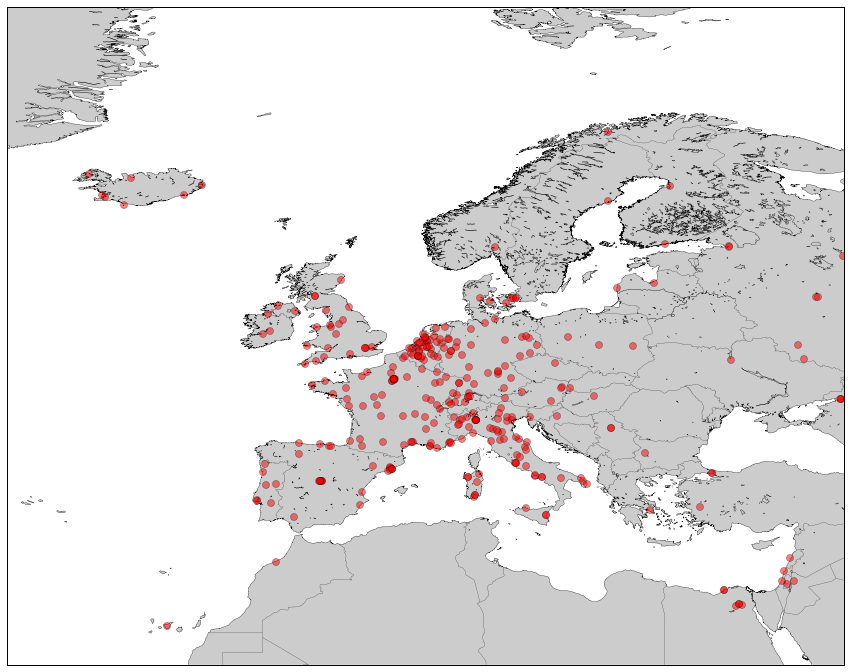

In [4]:
figure(figsize=(15,15))

# create the map: Europe
id_map = Basemap()
id_map = Basemap(llcrnrlon=-30, llcrnrlat=25, # lower left corner
                 urcrnrlon=40, urcrnrlat=80, # upper right corner
                 resolution="h") 

# draw important features
id_map.drawcoastlines(linewidth=.3) 
id_map.drawcountries(linewidth=.2)
id_map.fillcontinents(color='0.8') # Light gray
id_map.drawmapboundary()

# Transform from (lat, lon) to (x, y) 
x1, y1 = id_map(x, y)

# Plot data
for i in xrange(len(x1)):
    id_map.plot(x1[i], y1[i], 'or', 
                markersize=7, 
                alpha=.5)
    
# Save the file
plt.savefig('FabLabs-Europe.pdf')

## Asia

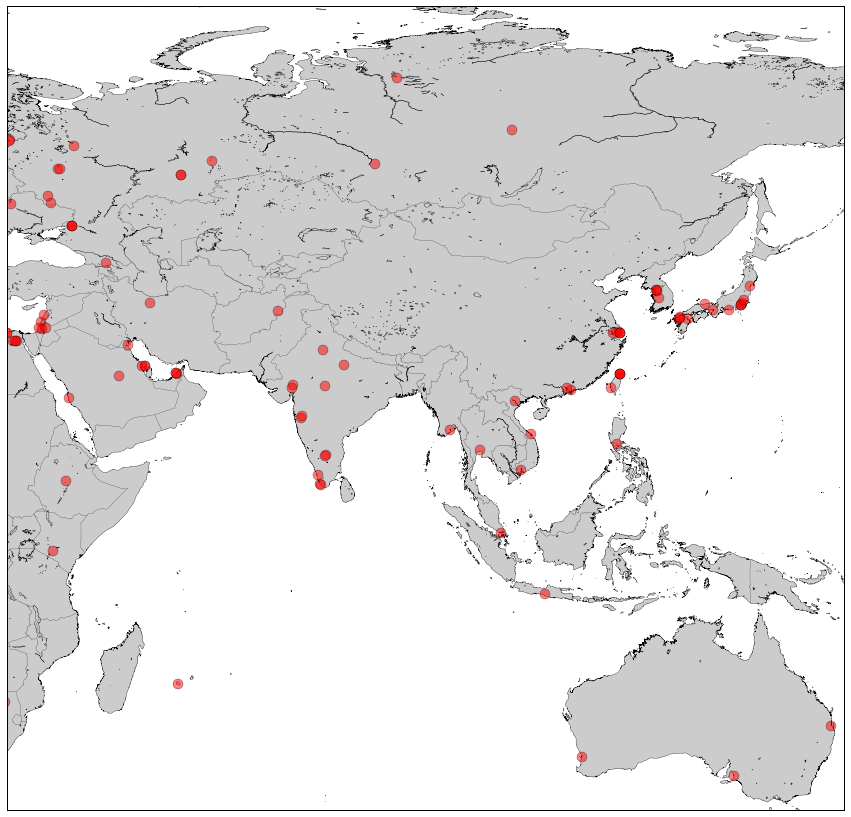

In [5]:
figure(figsize=(15,15))

# create the map: Asia
id_map = Basemap()
id_map = Basemap(llcrnrlon=30, llcrnrlat=-40, # lower left corner
                 urcrnrlon=155, urcrnrlat=80, # upper right corner 
                 resolution = "h") 

# draw important features
id_map.drawcoastlines(linewidth=.3) 
id_map.drawcountries(linewidth=.2)
id_map.fillcontinents(color='0.8') # Light gray
id_map.drawmapboundary()

# Transform from (lat, lon) to (x, y) 
x1, y1 = id_map(x, y)

# Plot data
for i in xrange(len(x1)):
    id_map.plot(x1[i], y1[i], 'or', 
                markersize=10, 
                alpha=.5)

# Save the file
plt.savefig('FabLabs-Asia.pdf')

## Africa

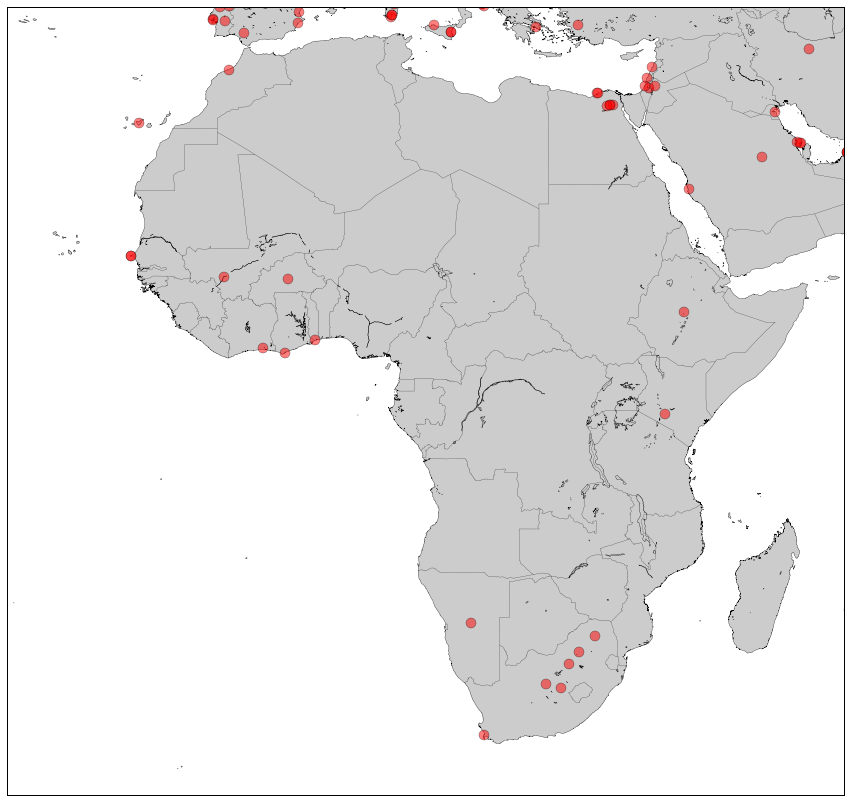

In [6]:
figure(figsize=(15,15))

# create the map: Africa
id_map = Basemap()
id_map = Basemap(llcrnrlon=-30, llcrnrlat=-40, # lower left corner
                 urcrnrlon=55, urcrnrlat=40, # upper right corner 
                 resolution = "h") 

# draw important features
id_map.drawcoastlines(linewidth=.3) 
id_map.drawcountries(linewidth=.2)
id_map.fillcontinents(color='0.8') # Light gray
id_map.drawmapboundary()

# Transform from (lat, lon) to (x, y) 
x1, y1 = id_map(x, y)

# Plot data
for i in xrange(len(x1)):
    id_map.plot(x1[i], y1[i], 'or', 
                markersize=10, 
                alpha=.5)

# Save the file
plt.savefig('FabLabs-Africa.pdf')

## America

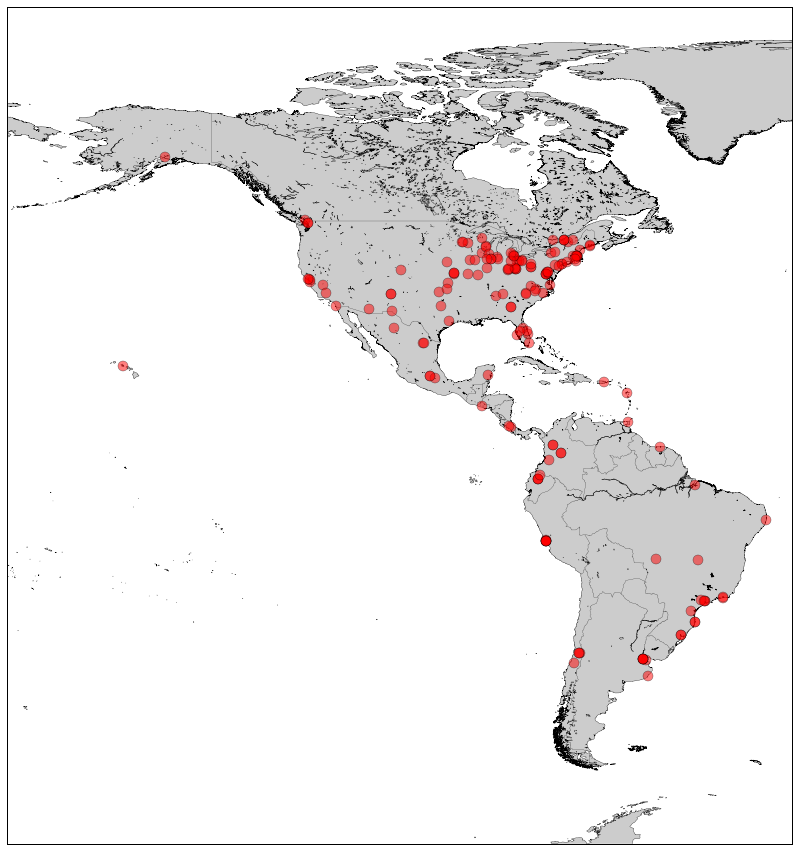

In [7]:
figure(figsize=(15,15))

# create the map: America
id_map = Basemap()
id_map = Basemap(llcrnrlon=-180, llcrnrlat=-70, # lower left corner
                 urcrnrlon=-30, urcrnrlat=90, # upper right corner 
                 resolution = "h") 

# draw important features
id_map.drawcoastlines(linewidth=.3) 
id_map.drawcountries(linewidth=.2)
id_map.fillcontinents(color='0.8') # Light gray
id_map.drawmapboundary()

# Transform from (lat, lon) to (x, y) 
x1, y1 = id_map(x, y)

# Plot data
for i in xrange(len(x1)):
    id_map.plot(x1[i], y1[i], 'or', 
                markersize=10, 
                alpha=.5)

# Save the file
plt.savefig('FabLabs-America.pdf')

## World: cities size mapped by number of labs

In [8]:
from collections import OrderedDict
import pycountry
from incf.countryutils import transformations

In [9]:
labs = {}
print "There are",len(fablab_list["labs"]),"FabLabs."

There are 606 FabLabs.


In [10]:
# Load data for reordering by continent - country later
groupedlabs = {}

for i in fablab_list["labs"]:
    labs[i["name"]] = {}
    labs[i["name"]]["name"] = i["name"]
    labs[i["name"]]["city"] = i["city"]
    country = pycountry.countries.get(alpha2=i["country_code"].upper())
    labs[i["name"]]["country"] = country.name
    continent = transformations.cca_to_ctn(i["country_code"])
    labs[i["name"]]["continent"] = continent
    
    # Save by continent and country
    if continent not in groupedlabs:
        groupedlabs[continent] = {}
    if country.name not in groupedlabs[continent]:
        groupedlabs[continent][country.name] = {}
    groupedlabs[continent][country.name][i["name"]] = labs[i["name"]]
        

In [12]:
# Get distribution of FabLabs per city

# Get list from cities in the data
cities = {}

for j,m in enumerate(labs):
    if labs[m]["city"] not in cities:
        cities[labs[m]["city"]] = {}
    cities[labs[m]["city"]][j] = 1
    
# Delete cities without a name
if "" in cities:
    del cities[""]
    
cities_stats = {}

for i in cities:
    cities_stats[i] = len(cities[i])

cities_stats2 = OrderedDict(sorted(cities_stats.items(), key=lambda t: t[1])) 

In [ ]:
# Get coordinates for cities
from geopy.geocoders import Nominatim
from time import sleep
geolocator = Nominatim()

x = []
y = []
size = []

from time import sleep

# Find city coordinates
for i in cities_stats2:
    # Let's not put too much stress on the geocoder service
    sleep(1)
    # Let's try to catch errors from the geocoder service
    try:
        location = geolocator.geocode(i)
        dove = location.address
        x.append(location.longitude)
        y.append(location.latitude)
        size.append(cities_stats2[i])
        # In order to avoid any problem with the geocoding API
        sleep(2)
        # print i, location.longitude, location.latitude, cities_stats2[i]
    except:
        print "City not found:",i

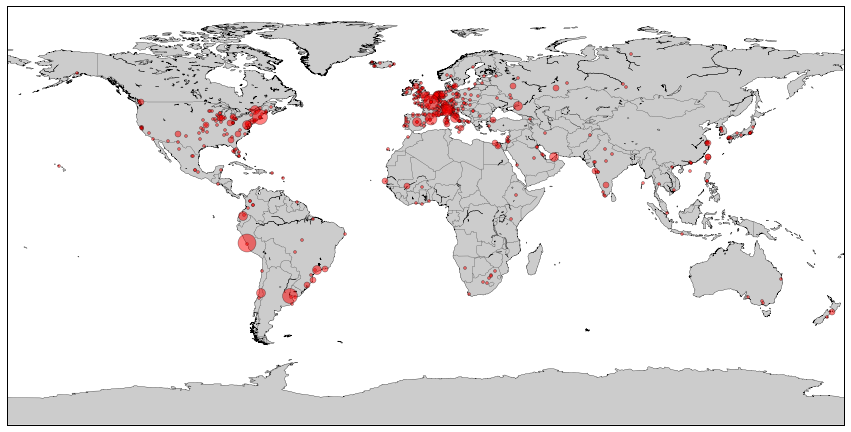

In [14]:
figure(figsize=(15,15))

# create the map: World
id_map = Basemap()
id_map = Basemap(resolution = 'l', area_thresh = 1000.0,
              lat_0=0, lon_0=0)

# draw important features
id_map.drawcoastlines(linewidth=.3) 
id_map.drawcountries(linewidth=.2)
id_map.fillcontinents(color='0.8') # Light gray
id_map.drawmapboundary()

# Transform from (lat, lon) to (x, y) 
x1, y1 = id_map(x, y)

# Plot data
for i in xrange(len(x1)):
    # Use this to filter out cities with less labs, if necessary
    if size[i] == 0:
        newsize = 0
    else:
        newsize = size[i]
    id_map.plot(x1[i], y1[i], 'or', 
                markersize=newsize*3, 
                alpha=.5)
    
# Save the file
plt.savefig('FabLabs-World-sizebynumber.pdf')